# numpy

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

## Задача №1. Скользящее окно

Реализовать функцию скользящего окна для заданного одномерного ряда данных, формирующую из него матрицу по следующему правилу:

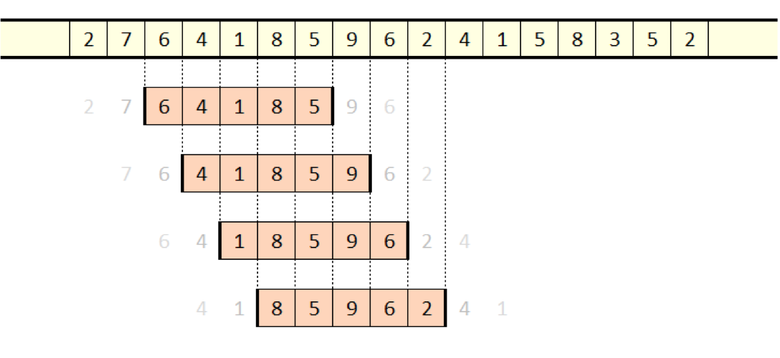

Аргументы функции:

*x_array* - одномерный массив **numpy.ndarray**

*w* - ширина окна для итоговой матрицы

*step* - шаг окна по исходному одномерному ряду данных

Результат:

*A_matrix* - матрица скользящего среднего

In [ ]:
def sliding_window(x_array, w, step = 1):

    A_matrix = np.array([])
    i = 0

    while (i + w) <= len(x_array):
      A_matrix = np.append(A_matrix, x_array[i:(i + w)])
      i += step

    A_matrix = A_matrix.reshape([len(A_matrix) // w, w])
    print(A_matrix)
    return A_matrix

In [ ]:
# проверка 1
window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])

print(np.array_equal(sliding_window(x1, w=window, step=step_s),A1))

# проверка 2
window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])

print(np.array_equal(sliding_window(x2, w=window, step=step_s),A2))

[[ 8.  1.  4.]
 [ 1.  4.  5.]
 [ 4.  5. -2.]
 [ 5. -2.  5.]
 [-2.  5.  9.]
 [ 5.  9.  0.]]
True
[[ 8.  3.]
 [-6.  5.]
 [10. 11.]]
True


# **Анализ данных по доходу населения UCI Adult**


Автор материала: Юрий Кашницкий (@yorko в Slack ODS). Материал распространяется на условиях лицензии Creative Commons CC BY-NC-SA 4.0. Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult)**

Уникальные значения признаков (больше информации по ссылке выше):

- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep = ", ", header=None,
                   names = ["age", "workclass", "fnlwgt", "education",
                    "education-num", "marital-status", "occupation", "relationship",
                    "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"])

list_of_objects = data.dtypes.axes[0][data.dtypes == "object"]
data[list_of_objects] = data[list_of_objects].astype("string")

data.head()

<ipython-input-7-594c77567b47>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep = ", ", header=None,


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## **0. Изучить в документации методы groupby и agg**

## **1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?**

### Визуализировать результат

In [ ]:
#number_of_person = pd.Series(len(data[data.sex=="Male"]))
number_of_person = pd.DataFrame([["Female", len(data[data.sex=="Female"])],
                                ["Male", len(data[data.sex=="Male"])]], columns=["sex", "number_of_person"])
number_of_person

,sex,number_of_person
0,Female,10771
1,Male,21790


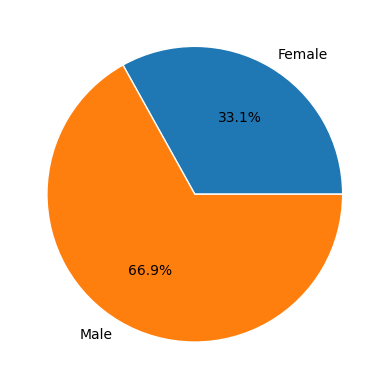

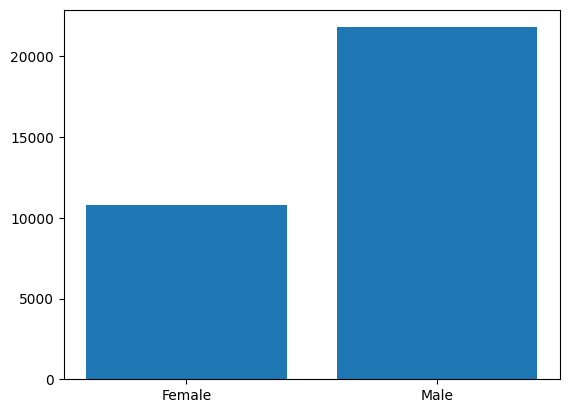

In [ ]:
plt.pie(number_of_person.number_of_person, radius=1, labels = number_of_person.sex,  autopct='%1.1f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
plt.show()

plt.bar(number_of_person.sex, number_of_person.number_of_person)
plt.show()

## **2. Каков средний возраст (признак age) женщин?**

In [ ]:
sum(data[data.sex=="Female"]["age"]) / len(data[data.sex=="Female"])

36.85823043357163

In [ ]:
data[data.sex=="Female"]["age"].mean()

36.85823043357163

## **3. Какова доля граждан Германии (признак native-country)?**

In [ ]:
len(data[data["native-country"]=="Germany"]) / len(data["native-country"]) * 100

0.42074874850281013

## **4-5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?**

### Визуализировать результат

In [ ]:
rich = data[data.salary == ">50K"]
print(rich.age.mean())
print(rich.age.std())

44.24984058155847
10.519027719851826


In [ ]:
poor = data[data.salary == "<=50K"]
print(poor.age.mean())
print(poor.age.std())

36.78373786407767
14.02008849082488


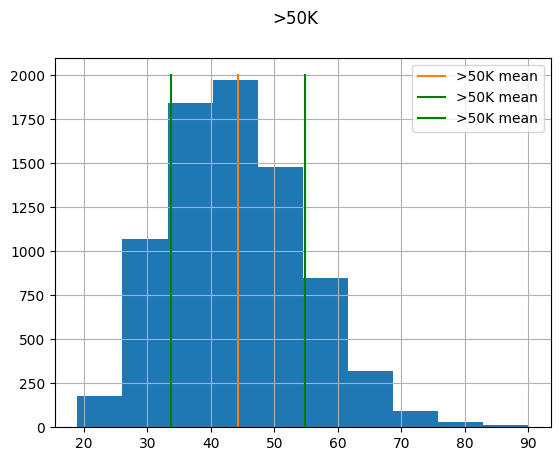

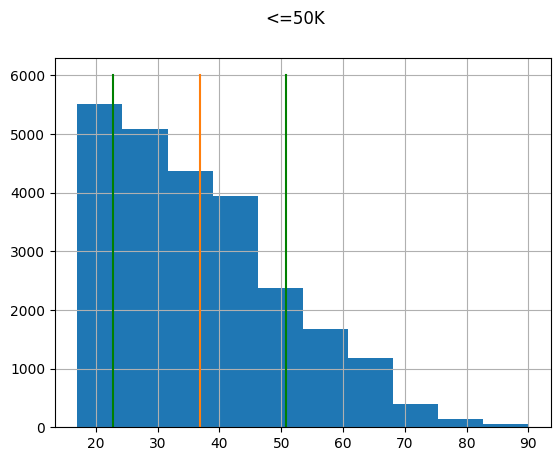

In [ ]:
labels = [">50K", "<=50K"]
rich.age.hist()
plt.suptitle('>50K')
plt.plot([rich.age.mean(), rich.age.mean()], [0, 2000], label=">50K mean")
plt.plot([rich.age.mean() - rich.age.std(), rich.age.mean() - rich.age.std()], [0, 2000], label=">50K mean", color="green")
plt.plot([rich.age.mean() + rich.age.std(), rich.age.mean() + rich.age.std()], [0, 2000], label=">50K mean", color="green")
plt.legend()
plt.show()

poor.age.hist()
plt.suptitle('<=50K')
plt.plot([poor.age.mean(), poor.age.mean()], [0, 6000], label="<=50K mean")
plt.plot([poor.age.mean() - poor.age.std(), poor.age.mean() - poor.age.std()], [0, 6000], label="<=50K std", color="green")
plt.plot([poor.age.mean() + poor.age.std(), poor.age.mean() + poor.age.std()], [0, 6000], label="<=50K std", color="green")
plt.show()

## **6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)**

In [ ]:
set(rich.education).difference(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]) == ()

False

## **7. Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.**

In [ ]:
data.groupby(['sex', 'race']).age.describe()

count       mean        std   min   25%   50%  \
sex    race                                                                  
Female Amer-Indian-Eskimo    119.0  37.117647  13.114991  17.0  27.0  36.0   
       Asian-Pac-Islander    346.0  35.089595  12.300845  17.0  25.0  33.0   
       Black                1555.0  37.854019  12.637197  17.0  28.0  37.0   
       Other                 109.0  31.678899  11.631599  17.0  23.0  29.0   
       White                8642.0  36.811618  14.329093  17.0  25.0  35.0   
Male   Amer-Indian-Eskimo    192.0  37.208333  12.049563  17.0  28.0  35.0   
       Asian-Pac-Islander    693.0  39.073593  12.883944  18.0  29.0  37.0   
       Black                1569.0  37.682600  12.882612  17.0  27.0  36.0   
       Other                 162.0  34.654321  11.355531  17.0  26.0  32.0   
       White               19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
sex    race                             
Female Amer-Indian-Eskimo  46.00  80.0  
       Asian-Pac-Islander  43.75  75.0  
       Black               46.00  90.0  
       Other               39.00  74.0  
       White               46.00  90.0  
Male   Amer-Indian-Eskimo  45.00  82.0  
       Asian-Pac-Islander  46.00  90.0  
       Black               46.00  90.0  
       Other               42.00  77.0  
       White               49.00  90.0

## **8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

### Визуализировать результат

0.8953767637346143
0.10462323626538572


([<matplotlib.patches.Wedge at 0x7c1e2524f340>,
 [Text(-1.041114882360001, 0.3550771771439578, 'married'),
  Text(1.0411148574264548, -0.3550772502511149, 'not-married')],
 [Text(-0.5678808449236368, 0.1936784602603406, '89.5%'),
  Text(0.5678808313235207, -0.19367850013697174, '10.5%')])

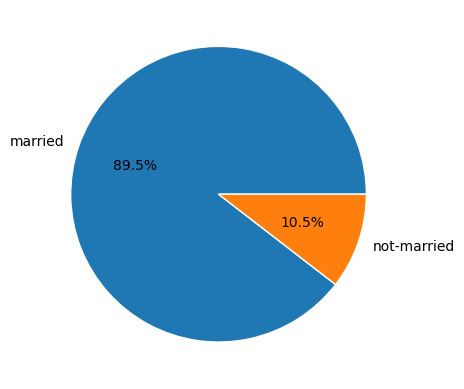

In [ ]:
mar = sum([i[:7] == "Married" for i in rich[rich.sex == "Male"]['marital-status']]) / len(rich[rich.sex == "Male"])
print(mar)
hol = sum([i[:7] == "Married" for i in poor[poor.sex == "Male"]['marital-status']]) / len(poor[poor.sex == "Male"])
print(hol)
plt.pie([mar, hol], radius=1, labels = ["married", "not-married"],  autopct='%1.1f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})

## **9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [ ]:
m = data['hours-per-week'].max()
print(m)
print(len(data[data['hours-per-week'] == m]))
print(len(data[data['hours-per-week'] == m][data.salary == ">50K"]) /len(data[data['hours-per-week'] == m]))

99
85
0.29411764705882354


<ipython-input-35-f91cc0dca68d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(data[data['hours-per-week'] == m][data.salary == ">50K"]) /len(data[data['hours-per-week'] == m]))


## **10. Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).**

### Визуализировать результат

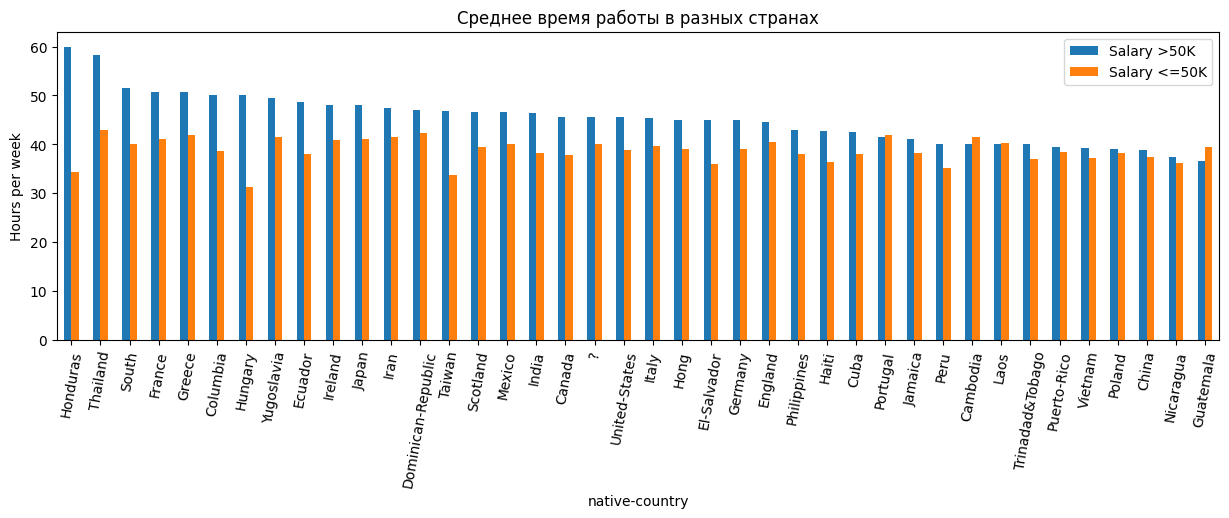

,Salary >50K,Salary <=50K
native-country,,
Honduras,60.000000,34.333333
Thailand,58.333333,42.866667
South,51.437500,40.156250
France,50.750000,41.058824
Greece,50.625000,41.809524
Columbia,50.000000,38.684211
Hungary,50.000000,31.300000
Yugoslavia,49.500000,41.600000
Ecuador,48.750000,38.041667


In [ ]:
rich_hours = rich.groupby(['native-country'])['hours-per-week'].mean()
rich_hours = rich_hours.nlargest(len(rich_hours))

poor_hours = poor.groupby(['native-country'])['hours-per-week'].mean()
poor_hours = pd.Series([poor_hours[i] for i in rich_hours.index], index = rich_hours.index)

itog = pd.DataFrame({'Salary >50K': rich_hours,
                   'Salary <=50K': poor_hours},
                  index=poor_hours.index)

plt.rcParams["figure.figsize"] = [15, 4]
itog.plot(kind='bar', ylabel = "Hours per week", title="Среднее время работы в разных странах")
plt.xticks(rotation=80)
plt.show()
itog